In [2]:
import sys
sys.path.append('Outputs_o1')
import matplotlib.pyplot as plt

import HF
import numpy as np

In [3]:
def plot_kspace(kspace):
    fig, ax = plt.subplots(figsize=(3,3),tight_layout=True)
    ax.scatter(*kspace.T,s=2)
    ax.set_aspect('equal')
    ax.set_xlabel('$k_x$')
    ax.set_ylabel('$k_y$')
def plot_matele(mat):
    fig, ax = plt.subplots(figsize=(3,3))
    ax.spy((mat))
    ax.set_title('$H_0$')
def plot_2d_bandstructure(ham,en):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for i in range(en.shape[0]):
        ax.plot_trisurf(ham.k_space[:,0],ham.k_space[:,1],en[i])
def plot_high_symm_bandstructure(k_list,en,ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    for e in en:
        k_abs=np.sqrt(np.diff(k_list[:,0])**2 + np.diff(k_list[:,1])**2)
        k_abs = np.concatenate([[0],np.cumsum(k_abs)])
        ax.plot(k_abs,e,color='k')
    Nk = (k_list.shape[0]-1)//4
    for i in range(5):
        ax.axvline(k_abs[Nk*i],ls='--',color='r')
    ax.set_xticks([k_abs[Nk*i] for i in range(5)],['$\Gamma$','K','M','$\Gamma$',"K'"])
    # ax.set_xlim([k_abs[0],k_abs[-1]])

    

In [4]:
import PLG_manual


In [12]:
from importlib import reload 
reload(PLG_manual)

<module 'PLG_manual' from '/mnt/d/Cornell/HartreeFock_GPT/test_coding/Outputs_o1/PLG_manual.py'>

# Check k-space

In [5]:
ham=PLG_manual.HartreeFockHamiltonian(N_shell=10)

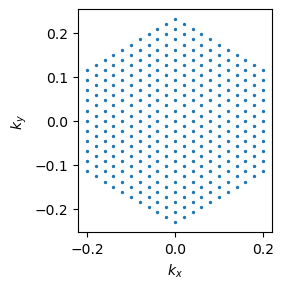

In [6]:
plot_kspace(kspace=ham.k_space)
# plt.scatter(ham.high_symm)
# plt.plot(*k_list.T)

In [78]:
high_symm= ham.high_symmetry_points(line=None)

In [79]:
high_symm

{'Gamma': array([0, 0]),
 'M': array([0.19975211, 0.        ]),
 "M'": array([0.09987605, 0.1729904 ]),
 'K': array([0.19975211, 0.11532693]),
 "K'": array([ 0.19975211, -0.11532693])}

# Check Lincut/2D plot

In [7]:
ham=PLG_manual.HartreeFockHamiltonian(N_shell=10)

In [8]:
h_nonint = ham.generate_non_interacting()

In [9]:
wf,en=HF.diagonalize(h_nonint)

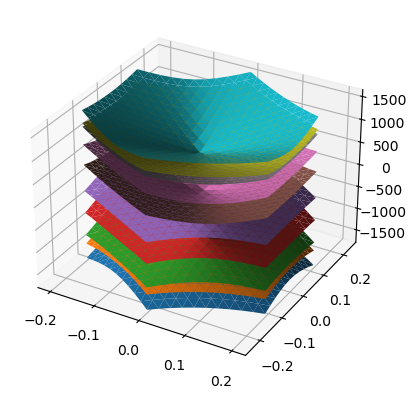

In [10]:
plot_2d_bandstructure(ham,en)

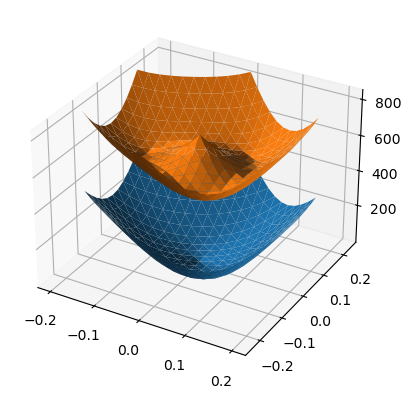

In [13]:
plot_2d_bandstructure(ham,en[5:7])

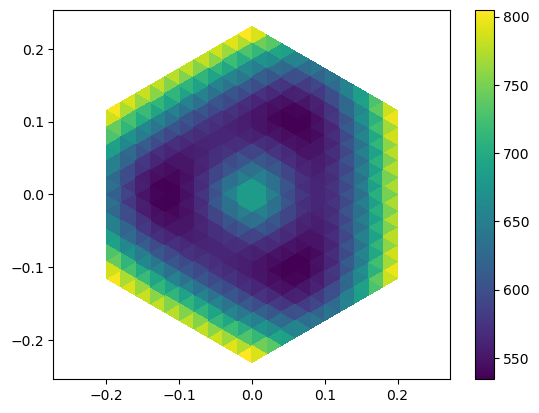

In [14]:
plt.tripcolor(ham.k_space[:,0],ham.k_space[:,1],en[6])
plt.axis('equal')
plt.colorbar()

# High symmetry points linecut

In [15]:
ham=PLG_manual.HartreeFockHamiltonian(N_shell=10)

In [16]:
k_list = ham.high_symmetry_points(["Gamma","K","M","Gamma","K'"],Nk=21)

In [17]:
h_0_linecut= ham.generate_non_interacting(k_list)


In [18]:
wf,en=HF.diagonalize(h_0_linecut)

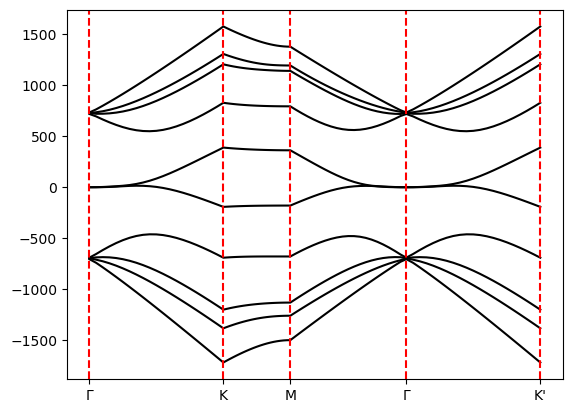

In [19]:
plot_high_symm_bandstructure(k_list,en)


In [ ]:
Mistake:
it should include valley and spin index
misses all moire superlattice
Band is too flat, I highly suspect the correctness

#  infinitesemial U limit

In [60]:
ham_int=PLG_manual.HartreeFockHamiltonian(N_shell=10,parameters={'epsilon':100})

In [61]:
wf,en=HF.diagonalize(ham_int.generate_non_interacting())
exp_val=HF.get_exp_val(wf,en,0.5,0)

In [62]:
wf_int, en_int, exp_val=HF.solve(ham_int,0*exp_val,100)

Convergence reached at iteration 1


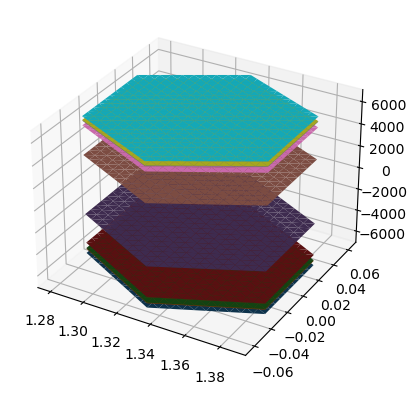

In [63]:
plot_2d_bandstructure(ham_int,en_int)

# Large U limit

In [149]:
ham_int=PLG_manual.HartreeFockHamiltonian(N_shell=10,parameters={'epsilon':1e-39})

In [150]:
wf,en=HF.diagonalize(ham_int.generate_non_interacting())
exp_val=HF.get_exp_val(wf,en,0.5,0)

In [153]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 74


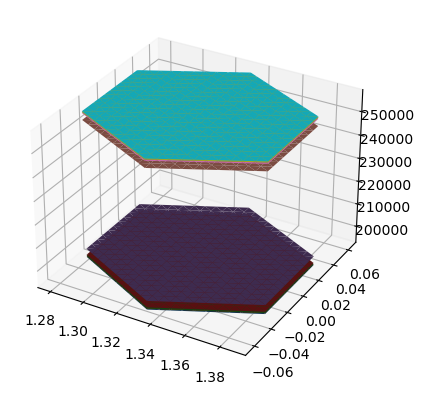

In [154]:
plot_2d_bandstructure(ham_int,en_int)

In [159]:
mean_U=np.abs(ham_int.generate_interacting(exp_val)).mean() 
mean_T=np.abs(ham_int.generate_non_interacting()).mean() 
gap = en_int[5].min()-en_int[4].max()

In [162]:
mean_U

25752.239186468785

In [165]:
print(f'Gap is {gap:.2f}')
print(f'U/T is {mean_U/mean_T:.2f}')
print(f'mean_U is {mean_U:.2f}')

Gap is 55471.59
U/T is 36.77
mean_U is 25752.24


In [ ]:
Mistake: The summation should include different valley and spin  